In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import requests
from io import StringIO
import csv

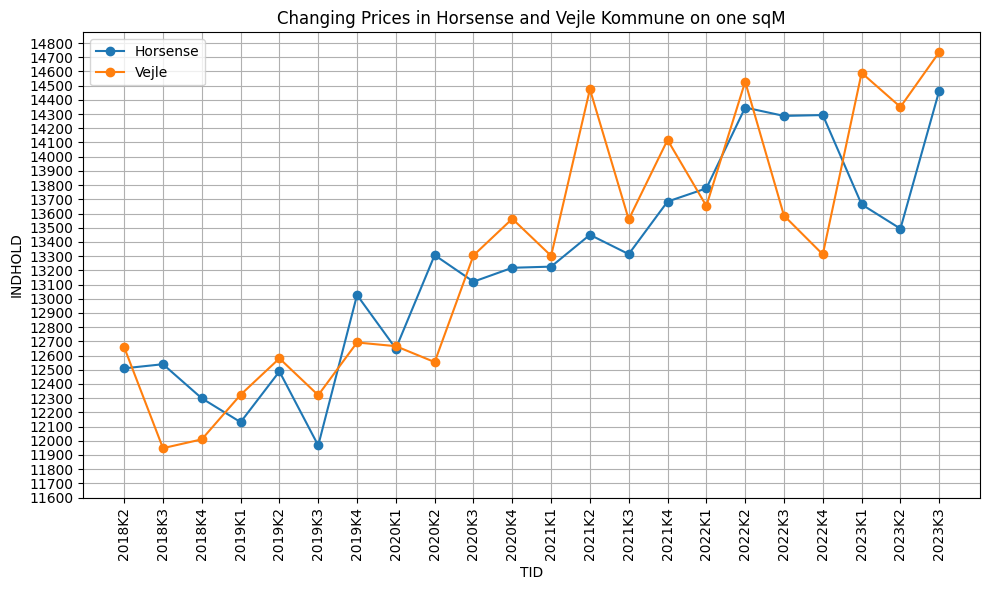

In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/BMP.csv', sep=';')

# Filter the DataFrame for København Kommune
filtered_df_cph = df[(df['TID'] > '2018K1') & (df['OMR20'] == 'Horsens')]
# Filter the DataFrame for Århus Kommune
filtered_df_aarhus = df[(df['TID'] > '2018K1') & (df['OMR20'] == 'Vejle')]

# Convert 'INDHOLD' column to numeric type using .loc
filtered_df_cph.loc[:, 'INDHOLD'] = pd.to_numeric(filtered_df_cph['INDHOLD'])
filtered_df_aarhus.loc[:, 'INDHOLD'] = pd.to_numeric(filtered_df_aarhus['INDHOLD'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df_cph['TID'], filtered_df_cph['INDHOLD'], marker='o', linestyle='-', label='Horsense')
plt.plot(filtered_df_aarhus['TID'], filtered_df_aarhus['INDHOLD'], marker='o', linestyle='-', label='Vejle')

# Adding title and labels
plt.title('Changing Prices in Horsense and Vejle Kommune on one sqM')
plt.xlabel('TID')
plt.ylabel('INDHOLD')

# Setting y-axis ticks
plt.yticks(range(11600, max(filtered_df_cph['INDHOLD'].max(), filtered_df_aarhus['INDHOLD'].max()) + 100, 100))

# Rotating x-axis tick labels for better readability
plt.xticks(rotation=90)

# Display the plot with legend
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

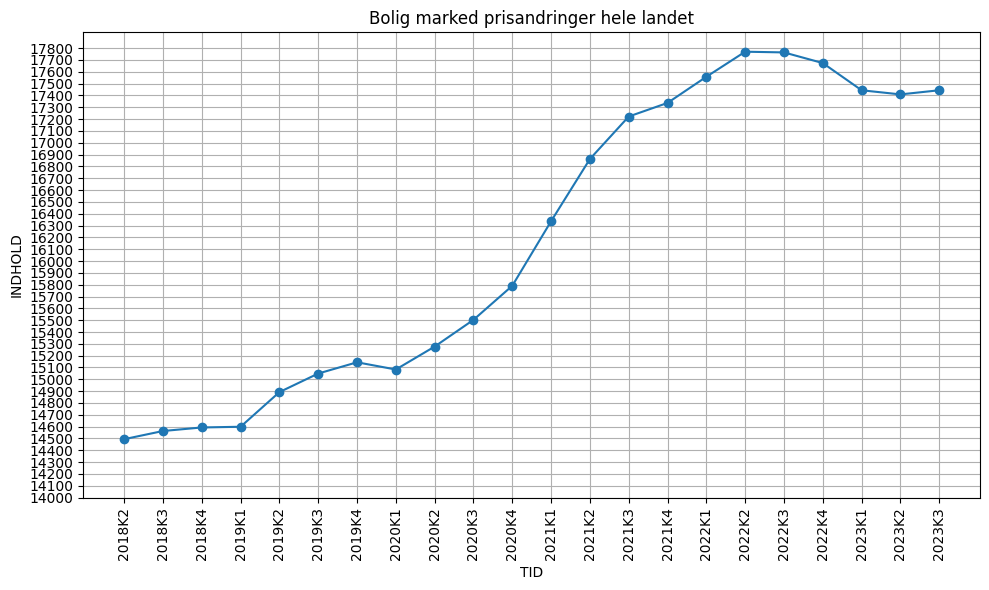

In [13]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/BMP.csv', sep=';')

filterBy = "Hele landet"

# Filter the DataFrame
filtered_df = df[(df['TID'] > '2018K1') & (df['OMR20'] == filterBy)]

# Convert 'INDHOLD' column to numeric type using .loc
filtered_df.loc[:, 'INDHOLD'] = pd.to_numeric(filtered_df['INDHOLD'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['TID'], filtered_df['INDHOLD'], marker='o', linestyle='-')

# Adding title and labels
plt.title('Bolig marked prisandringer ' + filterBy.lower())
plt.xlabel('TID')
plt.ylabel('INDHOLD')

# Setting y-axis ticks from 14000 to the maximum INDHOLD value, incrementing by 100
plt.yticks(range(14000, int(filtered_df['INDHOLD'].max()) + 100, 100))

# Rotating x-axis tick labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

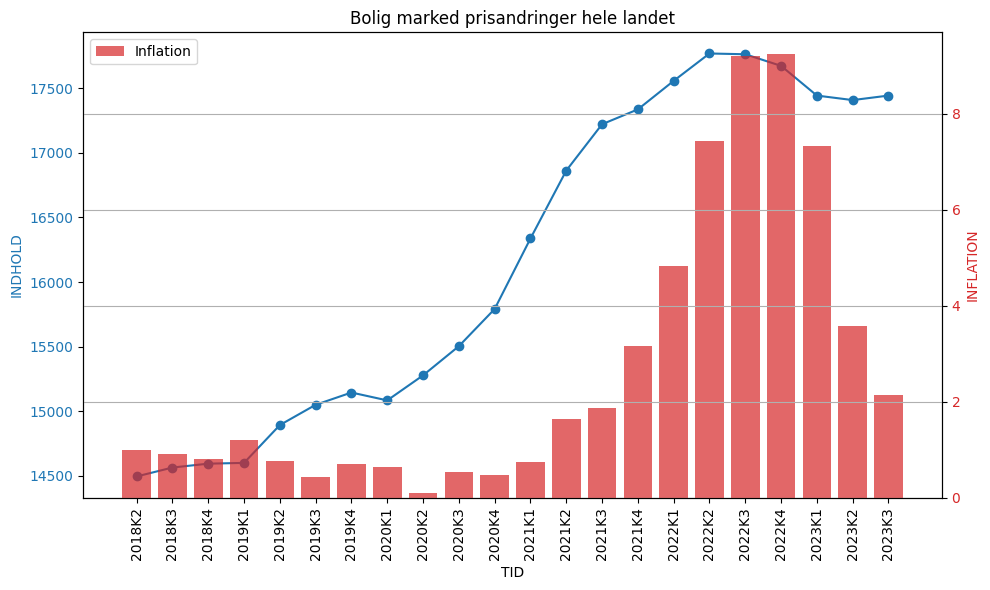

In [55]:


# Read the CSV file into a DataFrame for the price dataset
df_price = pd.read_csv('../data/BMP.csv', sep=';')

# Filter criteria for the price dataset
filterBy = "Hele landet"

# Filter the DataFrame for the price dataset
filtered_df_price = df_price[(df_price['TID'] > '2018K1') & (df_price['OMR20'] == filterBy)]

# Convert 'INDHOLD' column to numeric type using .loc
filtered_df_price.loc[:, 'INDHOLD'] = pd.to_numeric(filtered_df_price['INDHOLD'])

# Read the CSV file into a DataFrame for the inflation dataset
df_inflation = pd.read_csv('../data/INFLATION.csv', sep=';')

# Extracting the quarter from the 'TID' column for the inflation dataset
df_inflation['Kvartal'] = df_inflation['TID'].str.extract(r'(\d{4})M(\d{2})').apply(lambda x: f"{x[0]}K{(int(x[1]) - 1) // 3 + 1}", axis=1)

# Converting 'INDHOLD' to numeric for the inflation dataset
df_inflation['INDHOLD'] = pd.to_numeric(df_inflation['INDHOLD'], errors='coerce')

# Grouping by quarter and calculating the average for the inflation dataset
average_by_quarter = df_inflation.groupby('Kvartal')['INDHOLD'].mean()

# Combine the two DataFrames using 'TID' and 'Kvartal' columns
combined_df = pd.merge(filtered_df_price, average_by_quarter, left_on='TID', right_index=True, how='inner')

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 'INDHOLD' from the price dataset as a line chart
color = 'tab:blue'
ax1.set_xlabel('TID')
ax1.set_ylabel('INDHOLD', color=color)
ax1.plot(combined_df['TID'], combined_df['INDHOLD_x'], color=color, marker='o', linestyle='-', label='Price')
ax1.tick_params(axis='y', labelcolor=color)

# Set ticks and rotate x-axis ticks vertically
ax1.set_xticks(combined_df['TID'])
ax1.set_xticklabels(combined_df['TID'], rotation=90)

# Create a second y-axis for 'INFLATION' from the inflation dataset
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('INFLATION', color=color)
ax2.bar(combined_df['TID'], combined_df['INDHOLD_y'], color=color, alpha=0.7, label='Inflation')
ax2.tick_params(axis='y', labelcolor=color)

# Adding title
plt.title('Bolig marked prisandringer ' + filterBy.lower())

# Display the legend
plt.legend(loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
